In [1]:
import csv
import pandas as pd

In [2]:
gg_df = pd.read_csv('gg_final_dataframe.csv')
gg_df

,artist_id,artist_x,song_id,song_name,album_id,album,Like_Count,Lyric,date,year
0,80015705,SG워너비,80279378,Must Have Love (우리들의 겨울),20006374,SG워너비 & 브라운 아이드 걸스,"[40,450]",[함께 있단 이유로 행복했었던 \n우리들의 겨울날의 소중한 기억들\n좋은 날엔 언제...,2006-11-16,2006
1,80015705,브라운 아이드 걸스,1598921,어쩌다,20298156,My Style,"[45,790]",[* 어쩌다 어쩌다 어쩌다 \n널 사랑하게 됐는지 \n내가 왜 이꼴이 됐는지\n...,2008-09-16,2008
2,80015705,브라운 아이드 걸스,1597926,You,20298156,My Style,"[21,679]",[Yeah Yeah Yeah Yeah\n그대는 내게 바람과 같네 돌아와 Baby\n...,2008-09-16,2008
3,80015705,브라운 아이드 걸스,1775962,Abracadabra,444618,Sound G.,"[230,108]",[이러다 미쳐 내가 여리 여리 착하던 그런 내가\n너 때문에 돌아 내가 독한 나로 ...,2009-07-21,2009
4,80015705,브라운 아이드 걸스,1770201,Candy Man,444618,Sound G.,"[128,685]",[캔디처럼 달콤한 숨이 멈출듯한 미소\n몇번씩 몇번씩 무너지는거야 대체\nfanta...,2009-07-21,2009
...,...,...,...,...,...,...,...,...,...,...
1963,20164333,NewJeans,6170060,Attention,4082425,NewJeans 1st EP 'New Jeans',"[6,365]",[You and me\n내 맘이 보이지\n한참을 쳐다봐\n가까이 다가가\nYou s...,2022-08-01,2022
1964,20164333,NewJeans,6171084,Cookie,4082425,NewJeans 1st EP 'New Jeans',"[3,368]",[내가 만든 쿠키\n너를 위해 구웠지\nBut you know that it ain...,2022-08-01,2022
1965,20164333,NewJeans,6170218,Hurt,4082425,NewJeans 1st EP 'New Jeans',"[2,075]",[보고 싶은 생각에\n들어간 우리 창에\n나는 말을 거는데\n보내지는 않을래\n느린...,2022-08-01,2022
1966,20164333,NewJeans,6184997,Ditto,4078016,NewJeans 'OMG',"[4,218]",[Woo woo woo woo ooh\nWoo woo woo woo\nStay in...,2023-01-02,2023


In [ ]:
for cancelled_csv in list_csvs:
    print(cancelled_csv)
    specific_path = os.path.join(path_cancelled, cancelled_csv)
    artist_dataframe = pd.read_csv(specific_path)
    
    artist_dataframe.drop(columns = ['Unnamed: 0'], inplace = True)
    artist_dataframe.set_index('Datetime', inplace = True)
    
    artist_dataframe.drop(columns = ['Text', 'Username', 'cleaned_text'], inplace = True)
    
    artist_dataframe['weighting'] = 0.1 * artist_dataframe['likes'] + artist_dataframe['retweet'] 
    
    artist_dataframe.reset_index(inplace = True)
    artist_dataframe['Datetime'] = pd.to_datetime(artist_dataframe['Datetime'], yearfirst = True)
    artist_dataframe.set_index('Datetime', inplace = True)
    
    artist_positives = artist_dataframe[(artist_dataframe['classified_sentiment'] == 'Positive') | (artist_dataframe['classified_sentiment'] == 'Extremely Positive')]
    artist_positives.rename(columns = {'weighting':'positive_weights'}, inplace = True)
    
    artist_positive = artist_positives.groupby('Datetime').sum()
    artist_positive_df = pd.DataFrame(artist_positive.iloc[:,-1])
    
    artist_negatives = artist_dataframe[(artist_dataframe['classified_sentiment'] == 'Negative') | (artist_dataframe['classified_sentiment'] == 'Extremely Negative')]
    artist_negatives.rename(columns = {'weighting':'negative_weights'}, inplace = True)
    
    artist_negative = artist_negatives.groupby('Datetime').sum()
    artist_negative_df = pd.DataFrame(artist_negative.iloc[:,-1])
    
    artist_weighted_sentiment = pd.merge(artist_positive_df, artist_negative_df, how = 'outer', left_index= True, right_index= True)
    print(artist_weighted_sentiment)

# NLP

In [5]:
import re
import string
import nltk
# nltk.download('wordnet')
# nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import emoji
from cleantext import clean
import string
import re

from emot.emo_unicode import UNICODE_EMOJI

def clean_text(text):
    #changing to lowercase
    text = text.lower()
    
    # removing #´s 
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    
    #remove RT
    text = re.sub(r'RT[\s]+', '', text)
    
    #remove links
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r"www.\S+", "", text)
    
    #remove indentation
    text = re.sub(r'\n', '', text)

#     #remove emojis
#     text = clean(text, no_emoji=True)
    
    
    #tokenizing words
    tokens = word_tokenize(text)
    
    filtered_words = [w for w in tokens if w not in list(UNICODE_EMOJI.keys())]
    
    return text

In [6]:
gg_df['cleaned_lyrics'] = gg_df.Lyric.apply(clean_text)

In [10]:
gg_df_2 = gg_df[['artist_x', 'song_name', 'year', 'cleaned_lyrics']]

In [11]:
gg_df_2

,artist_x,song_name,year,cleaned_lyrics
0,SG워너비,Must Have Love (우리들의 겨울),2006,[함께 있단 이유로 행복했었던 우리들의 겨울날의 소중한 기억들좋은 날엔 언제나 네가...
1,브라운 아이드 걸스,어쩌다,2008,[* 어쩌다 어쩌다 어쩌다 널 사랑하게 됐는지 내가 왜 이꼴이 됐는지어쩌다 어쩌...
2,브라운 아이드 걸스,You,2008,[yeah yeah yeah yeah그대는 내게 바람과 같네 돌아와 babyfeel...
3,브라운 아이드 걸스,Abracadabra,2009,[이러다 미쳐 내가 여리 여리 착하던 그런 내가너 때문에 돌아 내가 독한 나로 변해...
4,브라운 아이드 걸스,Candy Man,2009,[캔디처럼 달콤한 숨이 멈출듯한 미소몇번씩 몇번씩 무너지는거야 대체fantastic...
...,...,...,...,...
1963,NewJeans,Attention,2022,[you and me내 맘이 보이지한참을 쳐다봐가까이 다가가you seeyou se...
1964,NewJeans,Cookie,2022,[내가 만든 쿠키너를 위해 구웠지but you know that it ain’t f...
1965,NewJeans,Hurt,2022,[보고 싶은 생각에들어간 우리 창에나는 말을 거는데보내지는 않을래느린 한마디보다조용...
1966,NewJeans,Ditto,2023,[woo woo woo woo oohwoo woo woo woostay in the...


In [20]:
by_year = gg_df_2.groupby(['year']).sum()[['cleaned_lyrics']]
by_year

,cleaned_lyrics
year,
2006,[함께 있단 이유로 행복했었던 우리들의 겨울날의 소중한 기억들좋은 날엔 언제나 네가...
2007,[와아 여름이다 막 이래here we go now&lt;이재훈&gt;어떡해 올 여름...
2008,[* 어쩌다 어쩌다 어쩌다 널 사랑하게 됐는지 내가 왜 이꼴이 됐는지어쩌다 어쩌...
2009,[이러다 미쳐 내가 여리 여리 착하던 그런 내가너 때문에 돌아 내가 독한 나로 변해...
2010,[전에 알던 내가 아냐 brand new sound새로워진 나와 함께 one mor...
2011,[feel watch plus sixth sense길들여질 수가 없어 나는 절대do...
2012,[너의 숨소리가 귓가에 불어오는 밤식지 않은 이 여름 밤을 난 너와 함께도시 불빛이...
2013,[나쁜 짓을 저질렀어요 그렇게 놀란 눈으로 날 보지 마요여기서 다 털어놓을까요어젯밤...
2014,[온도가 so hot 뜨거 like a roof on fire on the rock...


In [55]:
npnpn = by_year.iloc[2, :]

In [56]:
len(npnpn[0])

17692

In [22]:
stop_words = list(stopwords.words('english'))

manual_sw = ["n't", '내', '너의', '난', '날', '내가', '너','나', '그', '니', '걸', '거야'
             '널', '네', '니가', '네가', '널', '너를', '넌', '내게', '이', 'l', 'u', '-',
            'na', 'ah', 'e','m', 'uh', 'eh', 's', 'la', 'a', 'o', 'ta', 't', 'oh', 'du', 'yeah', '’']
#넌 난 어쩌구저쩌구 하는 것 부터가 사랑 노래라는 것을 시사하지 않나..

stop_words.extend(manual_sw)

by_year['cleaned_lyrics'] = by_year['cleaned_lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in manual_sw]))
by_year

,cleaned_lyrics
year,
2006,[함께 있단 이유로 행복했었던 우리들의 겨울날의 소중한 기억들좋은 날엔 언제나 있기...
2007,[와아 여름이다 막 이래here we go now&lt;이재훈&gt;어떡해 올 여름...
2008,[* 어쩌다 어쩌다 어쩌다 사랑하게 됐는지 왜 이꼴이 됐는지어쩌다 어쩌다 어쩌다 맘...
2009,[이러다 미쳐 여리 여리 착하던 그런 내가너 때문에 돌아 독한 나로 변해 내가너를 ...
2010,[전에 알던 아냐 brand new sound새로워진 나와 함께 one more r...
2011,[feel watch plus sixth sense길들여질 수가 없어 나는 절대do...
2012,[너의 숨소리가 귓가에 불어오는 밤식지 않은 여름 밤을 너와 함께도시 불빛이면 나는...
2013,[나쁜 짓을 저질렀어요 그렇게 놀란 눈으로 보지 마요여기서 다 털어놓을까요어젯밤 그...
2014,[온도가 so hot 뜨거 like roof on fire on the rocks ...


In [119]:
def words_by_year(year):
    df_by_year = by_year.loc[year, :]
    df_2 = " ".join(cat for cat in df_by_year)
    return df_2


In [121]:
df_2006 = words_by_year(2006)
df_2007 = words_by_year(2007)
df_2008 = words_by_year(2008)
df_2009 = words_by_year(2009)
df_2010 = words_by_year(2010)
df_2011 = words_by_year(2011)
df_2012 = words_by_year(2012)
df_2013 = words_by_year(2013)
df_2014 = words_by_year(2014)
df_2015 = words_by_year(2015)
df_2016 = words_by_year(2016)
df_2017 = words_by_year(2017)
df_2018 = words_by_year(2018)
df_2019 = words_by_year(2019)
df_2020 = words_by_year(2020)
df_2021 = words_by_year(2021)
df_2022 = words_by_year(2022)
# df_2023 = words_by_year(2023)

## wordcloud


In [29]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [122]:
def word_cloud_year(df):
    word_cloud = WordCloud(font_path='Binggrae', width = 1000, height = 300, 
    colormap='BuPu', max_words=100, collocations = False).generate(df)


    plt.figure(figsize = (10,8))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

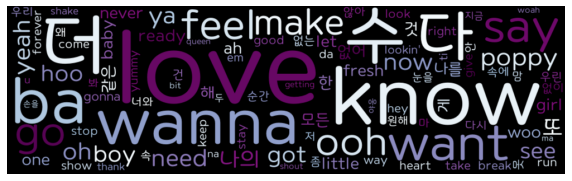

In [124]:
word_cloud_year(df_2022)

# frquency of a specific word (ratio)

In [ ]:
# Why boy is still so frequent?

In [139]:
def ratio_of_word(df_year, word):
    num_of_word = df_year.count(word)
    len_of_df = len(df_year)
    ratio = num_of_word / len_of_df *100
    return round(ratio, 3)

In [167]:
def word_by_years(text, word):
#     df_by_year = by_year.loc[year, :]
#     text = " ".join(cat for cat in text)
    num_of_word = text.count(word)
    len_of_df = len(text)
    ratio = num_of_word / len_of_df *100
    return round(ratio, 5)


In [168]:
#applymap

In [188]:
by_year['love'] = by_year.cleaned_lyrics.apply(lambda x: word_by_years(x, "love"))
by_year

,cleaned_lyrics,boy,love
year,,,
2006,[함께 있단 이유로 행복했었던 우리들의 겨울날의 소중한 기억들좋은 날엔 언제나 있기...,0.00000,0.32270
2007,[와아 여름이다 막 이래here we go now&lt;이재훈&gt;어떡해 올 여름...,0.04833,0.14498
2008,[* 어쩌다 어쩌다 어쩌다 사랑하게 됐는지 왜 이꼴이 됐는지어쩌다 어쩌다 어쩌다 맘...,0.03391,0.29392
2009,[이러다 미쳐 여리 여리 착하던 그런 내가너 때문에 돌아 독한 나로 변해 내가너를 ...,0.13960,0.20417
2010,[전에 알던 아냐 brand new sound새로워진 나와 함께 one more r...,0.10836,0.11452
2011,[feel watch plus sixth sense길들여질 수가 없어 나는 절대do...,0.14271,0.18277
2012,[너의 숨소리가 귓가에 불어오는 밤식지 않은 여름 밤을 너와 함께도시 불빛이면 나는...,0.07795,0.34320
2013,[나쁜 짓을 저질렀어요 그렇게 놀란 눈으로 보지 마요여기서 다 털어놓을까요어젯밤 그...,0.18586,0.34279
2014,[온도가 so hot 뜨거 like roof on fire on the rocks ...,0.04378,0.26906


In [194]:
by_year['boy'] = by_year.cleaned_lyrics.apply(lambda x: word_by_years(x, "boy"))
by_year

,cleaned_lyrics,boy,love,man,money
year,,,,,
2006,[함께 있단 이유로 행복했었던 우리들의 겨울날의 소중한 기억들좋은 날엔 언제나 있기...,0.00000,0.32270,0.02482,0.00000
2007,[와아 여름이다 막 이래here we go now&lt;이재훈&gt;어떡해 올 여름...,0.04833,0.14498,0.00604,0.00000
2008,[* 어쩌다 어쩌다 어쩌다 사랑하게 됐는지 왜 이꼴이 됐는지어쩌다 어쩌다 어쩌다 맘...,0.03391,0.29392,0.00000,0.00000
2009,[이러다 미쳐 여리 여리 착하던 그런 내가너 때문에 돌아 독한 나로 변해 내가너를 ...,0.13960,0.20417,0.00698,0.00000
2010,[전에 알던 아냐 brand new sound새로워진 나와 함께 one more r...,0.10836,0.11452,0.01108,0.00000
2011,[feel watch plus sixth sense길들여질 수가 없어 나는 절대do...,0.14271,0.18277,0.01335,0.00250
2012,[너의 숨소리가 귓가에 불어오는 밤식지 않은 여름 밤을 너와 함께도시 불빛이면 나는...,0.07795,0.34320,0.04439,0.00758
2013,[나쁜 짓을 저질렀어요 그렇게 놀란 눈으로 보지 마요여기서 다 털어놓을까요어젯밤 그...,0.18586,0.34279,0.01140,0.00000
2014,[온도가 so hot 뜨거 like roof on fire on the rocks ...,0.04378,0.26906,0.00747,0.00427


In [190]:
by_year['man'] = by_year.cleaned_lyrics.apply(lambda x: word_by_years(x, "man"))
by_year

,cleaned_lyrics,boy,love,man
year,,,,
2006,[함께 있단 이유로 행복했었던 우리들의 겨울날의 소중한 기억들좋은 날엔 언제나 있기...,0.00000,0.32270,0.02482
2007,[와아 여름이다 막 이래here we go now&lt;이재훈&gt;어떡해 올 여름...,0.04833,0.14498,0.00604
2008,[* 어쩌다 어쩌다 어쩌다 사랑하게 됐는지 왜 이꼴이 됐는지어쩌다 어쩌다 어쩌다 맘...,0.03391,0.29392,0.00000
2009,[이러다 미쳐 여리 여리 착하던 그런 내가너 때문에 돌아 독한 나로 변해 내가너를 ...,0.13960,0.20417,0.00698
2010,[전에 알던 아냐 brand new sound새로워진 나와 함께 one more r...,0.10836,0.11452,0.01108
2011,[feel watch plus sixth sense길들여질 수가 없어 나는 절대do...,0.14271,0.18277,0.01335
2012,[너의 숨소리가 귓가에 불어오는 밤식지 않은 여름 밤을 너와 함께도시 불빛이면 나는...,0.07795,0.34320,0.04439
2013,[나쁜 짓을 저질렀어요 그렇게 놀란 눈으로 보지 마요여기서 다 털어놓을까요어젯밤 그...,0.18586,0.34279,0.01140
2014,[온도가 so hot 뜨거 like roof on fire on the rocks ...,0.04378,0.26906,0.00747


In [193]:
by_year['money'] = by_year.cleaned_lyrics.apply(lambda x: word_by_years(x, "money"))
by_year

,cleaned_lyrics,boy,love,man,money
year,,,,,
2006,[함께 있단 이유로 행복했었던 우리들의 겨울날의 소중한 기억들좋은 날엔 언제나 있기...,0.00000,0.32270,0.02482,0.00000
2007,[와아 여름이다 막 이래here we go now&lt;이재훈&gt;어떡해 올 여름...,0.00000,0.14498,0.00604,0.00000
2008,[* 어쩌다 어쩌다 어쩌다 사랑하게 됐는지 왜 이꼴이 됐는지어쩌다 어쩌다 어쩌다 맘...,0.00000,0.29392,0.00000,0.00000
2009,[이러다 미쳐 여리 여리 착하던 그런 내가너 때문에 돌아 독한 나로 변해 내가너를 ...,0.00000,0.20417,0.00698,0.00000
2010,[전에 알던 아냐 brand new sound새로워진 나와 함께 one more r...,0.00000,0.11452,0.01108,0.00000
2011,[feel watch plus sixth sense길들여질 수가 없어 나는 절대do...,0.00250,0.18277,0.01335,0.00250
2012,[너의 숨소리가 귓가에 불어오는 밤식지 않은 여름 밤을 너와 함께도시 불빛이면 나는...,0.00758,0.34320,0.04439,0.00758
2013,[나쁜 짓을 저질렀어요 그렇게 놀란 눈으로 보지 마요여기서 다 털어놓을까요어젯밤 그...,0.00000,0.34279,0.01140,0.00000
2014,[온도가 so hot 뜨거 like roof on fire on the rocks ...,0.00427,0.26906,0.00747,0.00427


In [196]:
by_year['oppa'] = by_year.cleaned_lyrics.apply(lambda x: word_by_years(x, "오빠"))
by_year

,cleaned_lyrics,boy,love,man,money,oppa
year,,,,,,
2006,[함께 있단 이유로 행복했었던 우리들의 겨울날의 소중한 기억들좋은 날엔 언제나 있기...,0.00000,0.32270,0.02482,0.00000,0.00000
2007,[와아 여름이다 막 이래here we go now&lt;이재훈&gt;어떡해 올 여름...,0.04833,0.14498,0.00604,0.00000,0.00000
2008,[* 어쩌다 어쩌다 어쩌다 사랑하게 됐는지 왜 이꼴이 됐는지어쩌다 어쩌다 어쩌다 맘...,0.03391,0.29392,0.00000,0.00000,0.00000
2009,[이러다 미쳐 여리 여리 착하던 그런 내가너 때문에 돌아 독한 나로 변해 내가너를 ...,0.13960,0.20417,0.00698,0.00000,0.00000
2010,[전에 알던 아냐 brand new sound새로워진 나와 함께 one more r...,0.10836,0.11452,0.01108,0.00000,0.01724
2011,[feel watch plus sixth sense길들여질 수가 없어 나는 절대do...,0.14271,0.18277,0.01335,0.00250,0.00334
2012,[너의 숨소리가 귓가에 불어오는 밤식지 않은 여름 밤을 너와 함께도시 불빛이면 나는...,0.07795,0.34320,0.04439,0.00758,0.00433
2013,[나쁜 짓을 저질렀어요 그렇게 놀란 눈으로 보지 마요여기서 다 털어놓을까요어젯밤 그...,0.18586,0.34279,0.01140,0.00000,0.00526
2014,[온도가 so hot 뜨거 like roof on fire on the rocks ...,0.04378,0.26906,0.00747,0.00427,0.00747


In [199]:
by_year['want'] = by_year.cleaned_lyrics.apply(lambda x: word_by_years(x, "wan"))
by_year

,cleaned_lyrics,boy,love,man,money,oppa,sexy,want
year,,,,,,,,
2006,[함께 있단 이유로 행복했었던 우리들의 겨울날의 소중한 기억들좋은 날엔 언제나 있기...,0.00000,0.32270,0.02482,0.00000,0.00000,0.00000,0.13653
2007,[와아 여름이다 막 이래here we go now&lt;이재훈&gt;어떡해 올 여름...,0.04833,0.14498,0.00604,0.00000,0.00000,0.00000,0.14498
2008,[* 어쩌다 어쩌다 어쩌다 사랑하게 됐는지 왜 이꼴이 됐는지어쩌다 어쩌다 어쩌다 맘...,0.03391,0.29392,0.00000,0.00000,0.00000,0.00000,0.30522
2009,[이러다 미쳐 여리 여리 착하던 그런 내가너 때문에 돌아 독한 나로 변해 내가너를 ...,0.13960,0.20417,0.00698,0.00000,0.00000,0.02269,0.26874
2010,[전에 알던 아냐 brand new sound새로워진 나와 함께 one more r...,0.10836,0.11452,0.01108,0.00000,0.01724,0.01847,0.14777
2011,[feel watch plus sixth sense길들여질 수가 없어 나는 절대do...,0.14271,0.18277,0.01335,0.00250,0.00334,0.02086,0.17359
2012,[너의 숨소리가 귓가에 불어오는 밤식지 않은 여름 밤을 너와 함께도시 불빛이면 나는...,0.07795,0.34320,0.04439,0.00758,0.00433,0.03356,0.06063
2013,[나쁜 짓을 저질렀어요 그렇게 놀란 눈으로 보지 마요여기서 다 털어놓을까요어젯밤 그...,0.18586,0.34279,0.01140,0.00000,0.00526,0.00877,0.09468
2014,[온도가 so hot 뜨거 like roof on fire on the rocks ...,0.04378,0.26906,0.00747,0.00427,0.00747,0.00000,0.04591


In [186]:
import seaborn as sns

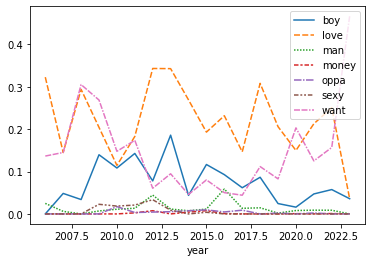

In [200]:
sns.lineplot(data=by_year, scalex='year', scaley='want')
plt.show()

In [164]:
list_of_boy

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [157]:
by_year.cleaned_lyrics.apply(boy_by_year("boy"))

TypeError: 'float' object is not callable

In [ ]:
def ratio_of_wordsss(word):
    num_of_word = df_year.cleaned_lyrics.count(word)
    len_of_df = len(df_year)
    ratio = num_of_word / len_of_df *100
    return round(ratio, 3)

In [146]:
ratio_of_word(df_2021, "boy")

0.047

In [144]:
ratio_of_word(df_2015, "")

0.571

In [147]:
boy_by_year = []
for i in range(2006,2023):
    boy_by_year.append(ratio_of_word(f'df_{i}', "boy"))

boy_by_year
    
    

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [117]:
num_of_love_2022 = df_2022_2.count("hype")
num_of_love_2022 / len(df_2022_2) *100

0.004558612358398104